# D212 Data Mining II Performance Assessment, Task \# 2

Submitted by William J Townsend, Student ID 003397146, for WGU's MSDA program

## Table of Contents
<ul>
<li><a href="#PartA1">A1: Research Question</a></li>
<li><a href="#PartA2">A2: Objectives and Goals of Analysis</a></li>
<li><a href="#PartB1">B1: Explanation of Principal Component Analysis/a></li>
<li><a href="#PartB2">B2: Assumptions of Principal Component Analysis</a></li>
<li><a href="#PartC1">C1: Identifying Continuous Dataset Variables</a></li>
<li><a href="#PartC2">C2: Standardizing Dataset Variables</a></li>
<li><a href="#PartD1">D1: Principal Component Matrix</a></li>
<li><a href="#PartD2">D2: Elbow Plot Identifying Number of Principal Components</a></li>
<li><a href="#PartD3">D3: Variance of Principal Components</a></li>
<li><a href="#PartD4">D4: Total Variance</a></li>
<li><a href="#PartD5">D5: Analysis Results</a></li>
<li><a href="#PartE">E: Code References</a></li> 
<li><a href="#PartF">F: Source References</a></li> 
</ul>

<a id='PartA1'></a>
## A1: Research Question

The research question tackled by this analysis is to determine if patient readmission can be effectively predicted through a decision tree classifier after principal component analysis (PCA) is used to reduce the dimensionality of the overall dataset. 

<a id="#PartA2"></a>
## A2: Objectives and Goals of Analysis

The goal of this analysis is to predict patient readmission. This is a fundamental concern of the WGU Hospital System, because high rates of patient readmission lead to government fines. Patient readmission can also lead to legal liabilities, while also inefficiently using hospital resources to treat a patient twice for the same issue (or a complication of the first issue), rather than "doing it right the first time". Avoiding readmission also inherently involves better outcomes for patients resulting from their initial hospitalization, which leads to increased patient satisfaction and quality of life. This is a somewhat ambitious goal, but its also one of the most important goals of the hospital, having significant positive impacts for both patients and the hospital system alike. 

<a id="#PartB1"></a>
## B1: Explanation of Prinicipal Component Analysis

Principal component analysis (PCA) is a dimensionality reduction process, operating by using feature extraction rather than feature elimination. This process extracts value from a large number of features by combining them in various weights to new "composite" features which represent multiple features in different weights. These newly generated features, each of which carry a portion of the value from their constituent original features, can then be evaluated to determine which ones are most important, and the degree to which each is important by measuring how much of the dataset's variability is explained by that new composite feature, called a "principal component". Less important principal components can be disregarded as not being "relevant enough" to the analysis, while the remaining principal components are carried forward into the model. If a final model has 5 principal components, but each of those principal components represents multiple original features which contributed to it, then the dimensionality of the original dataset was much larger and has thus been reduced by PCA. 

The expected outcome of principal component analysis is to generate a number of principal components equal to the number of continuous features provided to the PCA. The value of each of these principal components can then be determined by using the `explained_variance_ratio_` attribute. The most important principal components will then be saved, while the remainder will be dropped. This will reduce the dimensionality of the dataset by allowing me to reduce the number of features. 

<a id="#PartB2"></a>
## B2: Assumptions of Principal Component Analysis

Principal component analysis requires an adequate sample size, increasing the size of the dataset for each variable or feature in the dataset. If a particular feature has too small of a sample size, then the PCA's accounting for that feature will be invalid because it cannot adequately ascertain that feature's relationship to other features, which it needs to do in order to generate its composite principal components, which are combinations of the original contributing features. 

<a id="#PartC1"></a>
## C1: Identifying Continuous Dataset Variables

This principal component analysis will utilize all of the quantitative variables in the dataset:

- Latitude of patient's residence
- Longitude of patient's residence
- Population of area of patient's residence
- Number of children in patient's household
- Age of patient
- Income of patient (or primary insurance holder)
- Patient's Vitamin D level
- Number of times the primary physician visited the patient
- Number of full meals eaten by patient during hospitalization
- Number of Vitamin D supplements administered to patient
- Length of initial hospitalization in days
- Average daily amount charged to patient for hospitalization
- Average daily amount charged to patient for additional non-typical charges (procedures, treatments, medicines, etc.)

I expect that several of these will not have any significant impact on the research question, and I could justifiably omit them from consideration. For example, latitude, longitude, and population likely have nothing to do with the patient's healthcare concerns or outcomes. However, given that this is an unsubstantiated assumption and that the point of this project is to use PCA for dimensionality reduction, I will use all of these variables, and let PCA omit features, rather than omitting them myself. 

<a id="#PartC2"></a>
## C2: Standardizing Dataset Variables

Following is the code for importing the medical dataset and preparing it, including standardization of the continuous variables. I included scripting to demonstrate that all 13 quantitative data columns have in fact been standardized to a mean of 0 and a standard deviation of 0, at the end of the standardization operation. I also generated the covariance matrix, which indicated that two features were nearly perfectly correlated, so one of the two features was eliminated and the process repeated with the remaining 12 variables. 

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score 

# The CSV's first column is an index and Pandas will duplicate this and create an column without 'index_col=0'
df = pd.read_csv('./medical_clean.csv', index_col=0)
# Check data types and number of values, as well as overall size of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

In [2]:
# Visually inspect dataframe to facilitate exploration, spot problems
pd.set_option("display.max_columns", None)
df.head(5)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [3]:
# Convert column to string from int, then front-fill string with 0's to reach 5 chars
df['Zip'] = df['Zip'].astype("str").str.zfill(5)
# Convert column to category from string
df["Area"] = df["Area"].astype("category")
# Replace city-specific values with time-zone specific values
df.TimeZone.replace({
    # Puerto Rico does not observe DST, stays on Atlantic Standard Time all year long
    "America/Puerto_Rico" : "US - Puerto Rico",
    # US - Eastern observes DST
    "America/New_York": "US - Eastern",
    "America/Detroit" : "US - Eastern",
    "America/Indiana/Indianapolis" : "US - Eastern",
    "America/Indiana/Vevay" : "US - Eastern",
    "America/Indiana/Vincennes" : "US - Eastern",
    "America/Kentucky/Louisville" : "US - Eastern",
    "America/Toronto" : "US - Eastern",
    "America/Indiana/Marengo" : "US - Eastern",
    "America/Indiana/Winamac" : "US - Eastern",
    # US - Central observes DST
    "America/Chicago" : "US - Central", 
    "America/Menominee" : "US - Central",
    "America/Indiana/Knox" : "US - Central",
    "America/Indiana/Tell_City" : "US - Central",
    "America/North_Dakota/Beulah" : "US - Central",
    "America/North_Dakota/New_Salem" : "US - Central",
    # US - Mountain observes DST
    "America/Denver" : "US - Mountain",
    "America/Boise" : "US - Mountain",
    # Arizona does not observe DST, stays on Mountain Standard Time all year long
    "America/Phoenix" : "US - Arizona",
    # US - Pacific observes DST
    "America/Los_Angeles" : "US - Pacific",
    # US - Alaskan observes DST
    "America/Nome" : "US - Alaskan",
    "America/Anchorage" : "US - Alaskan",
    "America/Sitka" : "US - Alaskan",
    "America/Yakutat" : "US - Alaskan",
    # US - Aleutian observes DST
    "America/Adak" : "US - Aleutian",
    # US - Hawaiian does not observe DST, stays on Hawaii Standard Time all year
    "Pacific/Honolulu" : "US - Hawaiian" 
    }, inplace=True)
# Convert column to category from string
df["TimeZone"] = df["TimeZone"].astype("category")
# Reformat column representing currency in USD to integer
df["Income"] = df["Income"].astype(int)
# Convert column to category from string
df["Marital"] = df["Marital"].astype("category")
# Convert column to category from string
df["Gender"] = df["Gender"].astype("category")
# Recast object > boolean wants to turn everything True, need to map Yes/No to True/False
bool_mapping = {"Yes" : True, "No" : False}
# Convert column to boolean from string
df["ReAdmis"] = df["ReAdmis"].map(bool_mapping)
# Convert column to boolean from string
df["Soft_drink"] = df["Soft_drink"].map(bool_mapping)
# Convert column to category from string
df["Initial_admin"] = df["Initial_admin"].astype("category")
# Convert column to boolean from string
df["HighBlood"] = df["HighBlood"].map(bool_mapping)
# Convert column to boolean from string
df["Stroke"] = df["Stroke"].map(bool_mapping)
# Convert column to category from string
df["Complication_risk"] = df["Complication_risk"].astype("category")
# Convert column to boolean from string
df["Overweight"] = df["Overweight"].map(bool_mapping)
# Convert column to boolean from string
df["Arthritis"] = df["Arthritis"].map(bool_mapping)
# Convert column to boolean from string
df["Diabetes"] = df["Diabetes"].map(bool_mapping)
# Convert column to boolean from string
df["Hyperlipidemia"] = df["Hyperlipidemia"].map(bool_mapping)
# Convert column to boolean from string
df["BackPain"] = df["BackPain"].map(bool_mapping)
# Convert column to boolean from string
df["Anxiety"] = df["Anxiety"].map(bool_mapping)
# Convert column to boolean from string
df["Allergic_rhinitis"] = df["Allergic_rhinitis"].map(bool_mapping)
# Convert column to boolean from string
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].map(bool_mapping)
# Convert column to boolean from string
df["Asthma"] = df["Asthma"].map(bool_mapping)
# Convert column to category from string
df["Services"] = df["Services"].astype("category")
# Reformat column representing currency in USD to 3 decimal places from 6
df["TotalCharge"] = df.TotalCharge.round(3)
# Reformat column representing currency in USD to 3 decimal places from 6
df["Additional_charges"] = df.Additional_charges.round(3)
# Establish map for reversing survey questions to reflect a truth where 1 < 8 (currently the reverse)
survey_mapping = {1: 8, 2: 7, 3 : 6, 4: 5, 5: 4, 6: 3, 7 : 2, 8 : 1}
# Establish ordered categorical datatype structure ("1" < "2" < ... < "7" < "8") for survey response columns
survey_scores = CategoricalDtype(categories=["1", "2", "3", "4", "5", "6", "7", "8"], ordered=True)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item1"] = df["Item1"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item1"] = df["Item1"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item1"] = df["Item1"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item2"] = df["Item2"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item2"] = df["Item2"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item2"] = df["Item2"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item3"] = df["Item3"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item3"] = df["Item3"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item3"] = df["Item3"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item4"] = df["Item4"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item4"] = df["Item4"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item4"] = df["Item4"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item5"] = df["Item5"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item5"] = df["Item5"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item5"] = df["Item5"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item6"] = df["Item6"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item6"] = df["Item6"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item6"] = df["Item6"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item7"] = df["Item7"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item7"] = df["Item7"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item7"] = df["Item7"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item8"] = df["Item8"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item8"] = df["Item8"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item8"] = df["Item8"].astype(survey_scores)
# Generate column names which are pythonic in syntax and descriptive
pythonic_columns = ["customer_id", "interaction", "uid", "city", "state", "county", 
                    "zip_code", "latitude", "longitude", "population", "area_type", "timezone", "job", "children", 
                    "age", "income", "marital_status", "gender", "readmission", 
                    "vitamin_d_level", "dr_visits", "full_meals", "vit_d_supp", "soft_drink", "initial_admit", 
                    "high_bp", "stroke", "complication_risk", "overweight", "arthritis", "diabetes", "hyperlipidemia", 
                    "back_pain", "anxiety", "allergic_rhinitis", "reflux_esophagitis", "asthma", "services", 
                    "days_hospitalized", "daily_charge", "addl_charge", "surv1_timely_admit", "surv2_timely_treat", 
                    "surv3_timely_visit", "surv4_reliable", "surv5_options", "surv6_hours", "surv7_courteous", 
                    "surv8_dr_listen"]
# Implement new pythonic column headings
df.set_axis(pythonic_columns, axis=1, inplace=True)
# Visually inspect DF for appropriate appearance and values
df.head()

,customer_id,interaction,uid,city,state,county,zip_code,latitude,longitude,population,area_type,timezone,job,children,age,income,marital_status,gender,readmission,vitamin_d_level,dr_visits,full_meals,vit_d_supp,soft_drink,initial_admit,high_bp,stroke,complication_risk,overweight,arthritis,diabetes,hyperlipidemia,back_pain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,services,days_hospitalized,daily_charge,addl_charge,surv1_timely_admit,surv2_timely_treat,surv3_timely_visit,surv4_reliable,surv5_options,surv6_hours,surv7_courteous,surv8_dr_listen
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,US - Central,"Psychologist, sport and exercise",1,53,86575,Divorced,Male,False,19.141466,6,0,0,False,Emergency Admission,True,False,Medium,False,True,True,False,True,True,True,False,True,Blood Work,10.585770,3726.703,17939.403,6,6,7,7,5,6,6,5
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,US - Central,Community development worker,3,51,46805,Married,Female,False,18.940352,4,2,1,False,Emergency Admission,True,False,High,True,False,False,False,False,False,False,True,False,Intravenous,15.129562,4193.190,17612.998,6,5,6,5,5,5,6,6
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,US - Central,Chief Executive Officer,3,53,14370,Widowed,Female,False,18.057507,4,1,0,False,Elective Admission,True,False,Medium,True,False,True,False,False,False,False,False,False,Blood Work,4.772177,2434.234,17505.192,7,5,5,5,6,5,6,6
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,US - Central,Early years teacher,0,78,39741,Married,Male,False,16.576858,4,1,0,False,Elective Admission,False,True,Medium,False,True,False,False,False,False,False,True,True,Blood Work,1.714879,2127.830,12993.437,6,4,4,6,5,4,4,4
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,US - Eastern,Health promotion specialist,1,22,1209,Widowed,Female,False,17.439069,5,0,2,True,Elective Admission,False,False,Low,False,False,False,True,False,False,True,False,False,CT Scan,1.254807,2113.073,3716.526,7,8,6,6,4,6,5,6


In [4]:
# Create X dataframe with all of the continuous variables for PCA
X = df[["latitude", "longitude", "population", "children", "age", "income", "vitamin_d_level", "dr_visits", 
        "full_meals", "vit_d_supp",  "days_hospitalized", "daily_charge", "addl_charge"]].copy()
# Create list of column headers (we'll refer to this in the next cell)
X_cols = list(X.columns)
# Set y to be the readmission data that we're interested in predicting
y = df["readmission"]

In [5]:
# Standardize X to avoid dominance of large ranged features over smaller ranged ones
# Can do this by instantiating the StandardScaler(), then fitting to X, then transforming X, but this does so in a single line
# Create array of X values that are standardized with  all of the continuous variables for PCA
X_std = StandardScaler().fit_transform(df[["latitude", "longitude", "population", "children", "age", "income", "vitamin_d_level", "dr_visits", 
        "full_meals", "vit_d_supp",  "days_hospitalized", "daily_charge", "addl_charge"]].copy())
# Verify that everything has been standardized to mean of 0, standard deviation of 1
print(f"Verifying means and standard deviation of each feature...")
# Stick the standardized values into a temporary dataframe that we'll use for verifications
X_std_df = pd.DataFrame(X_std, columns=X_cols)
# Print out the mean and the standard deviation for each of the 13 columns that we've standardized
for column in X_cols:
    col_mean = round(X_std_df.loc[:,column].mean(), 4)
    col_std = round(X_std_df.loc[:,column].std(), 4)
    print(f"For column '{column}', the mean is {col_mean} and the standard deviation is {col_std}.")

Verifying means and standard deviation of each feature...
For column 'latitude', the mean is -0.0 and the standard deviation is 1.0001.
For column 'longitude', the mean is 0.0 and the standard deviation is 1.0001.
For column 'population', the mean is -0.0 and the standard deviation is 1.0001.
For column 'children', the mean is -0.0 and the standard deviation is 1.0001.
For column 'age', the mean is 0.0 and the standard deviation is 1.0001.
For column 'income', the mean is 0.0 and the standard deviation is 1.0001.
For column 'vitamin_d_level', the mean is -0.0 and the standard deviation is 1.0001.
For column 'dr_visits', the mean is 0.0 and the standard deviation is 1.0001.
For column 'full_meals', the mean is 0.0 and the standard deviation is 1.0001.
For column 'vit_d_supp', the mean is -0.0 and the standard deviation is 1.0001.
For column 'days_hospitalized', the mean is -0.0 and the standard deviation is 1.0001.
For column 'daily_charge', the mean is -0.0 and the standard deviation i

In [6]:
# Define colors for the conditional formatting that we'll apply to our covariance matrix
def highlight_cells (val):
    if val > 0.9:
        color = 'red'
    elif val > 0.6:
        color = 'yellow'
    else:
        color = ''
    return f"background: {color}"

# Generate covariance_matrix (much quicker and more precise that an SNS pairplot of all of this data)
covariance_matrix = pd.DataFrame.cov(X_std_df)
# Apply the styling defined in the above defined function, very closely correllated features will be red
covariance_matrix.style.applymap(highlight_cells)

,latitude,longitude,population,children,age,income,vitamin_d_level,dr_visits,full_meals,vit_d_supp,days_hospitalized,daily_charge,addl_charge
latitude,1.000100,-0.112359,-0.207593,0.006374,-0.007270,-0.019371,0.001494,0.008380,0.003401,0.001286,-0.008821,-0.010760,-0.002283
longitude,-0.112359,1.000100,-0.031982,-0.014115,0.007494,-0.006666,-0.006390,0.000754,-0.014232,-0.001961,-0.009293,-0.008831,0.000079
population,-0.207593,-0.031982,1.000100,0.002462,-0.018989,0.005427,0.002652,0.012647,-0.025610,0.009782,0.017471,0.019190,-0.004821
children,0.006374,-0.014115,0.002462,1.000100,0.009837,0.007177,0.009488,-0.002292,0.003835,-0.004320,0.022469,0.024103,0.013550
age,-0.007270,0.007494,-0.018989,0.009837,1.000100,-0.012229,0.010316,0.006899,0.008556,0.010015,0.016266,0.016877,0.716925
income,-0.019371,-0.006666,0.005427,0.007177,-0.012229,1.000100,-0.013116,0.013465,-0.011366,0.001254,-0.012466,-0.014347,-0.009826
vitamin_d_level,0.001494,-0.006390,0.002652,0.009488,0.010316,-0.013116,1.000100,0.010211,0.023226,-0.007204,-0.003642,-0.001403,0.008291
dr_visits,0.008380,0.000754,0.012647,-0.002292,0.006899,0.013465,0.010211,1.000100,-0.002768,0.005682,-0.006755,-0.005044,0.008072
full_meals,0.003401,-0.014232,-0.025610,0.003835,0.008556,-0.011366,0.023226,-0.002768,1.000100,-0.019982,-0.017269,-0.014307,0.018765
vit_d_supp,0.001286,-0.001961,0.009782,-0.004320,0.010015,0.001254,-0.007204,0.005682,-0.019982,1.000100,0.015976,0.016926,0.010328


In [7]:
# Covariance matrix indicates that days_hospitalized and daily_charge are nearly perfectly correlated
print(f"The correlation between days_hospitalized and daily_charge is {X_std_df.days_hospitalized.corr(X_std_df.daily_charge)}.")
print("This correlation indicates that these two features are providing nearly the same information, making one of them redundant.")
# One column should be dropped because of this redundancy. I'm choosing to keep days_hospitalized
# The easiest way to do this, rather than editing X_std (a 2D NumPy array) is to just re-create X_std

The correlation between days_hospitalized and daily_charge is 0.9876402654441183.
This correlation indicates that these two features are providing nearly the same information, making one of them redundant.


In [8]:
# Re-create X and X_cols to reflect this change
X = df[["latitude", "longitude", "population", "children", "age", "income", "vitamin_d_level", "dr_visits", 
        "full_meals", "vit_d_supp",  "days_hospitalized", "addl_charge"]].copy()
X_cols = list(X.columns)
# Re-create array of standardized X values, omitting 'daily_charge' this time
X_std = StandardScaler().fit_transform(df[["latitude", "longitude", "population", "children", "age", "income", "vitamin_d_level", "dr_visits", 
        "full_meals", "vit_d_supp",  "days_hospitalized", "addl_charge"]].copy())
# Re-verify that everything has been standardized to mean of 0, standard deviation of 1
print(f"Verifying means and standard deviation of each feature...")
# Stick the standardized values into a temporary dataframe that we'll use for verifications
X_std_df = pd.DataFrame(X_std, columns=X_cols)
# Print out the mean and the standard deviation for each of the 13 columns that we've standardized
for column in X_cols:
    col_mean = round(X_std_df.loc[:,column].mean(), 4)
    col_std = round(X_std_df.loc[:,column].std(), 4)
    print(f"For column '{column}', the mean is {col_mean} and the standard deviation is {col_std}.")
# With everything standardized, we can provide the cleaned and standardized dataset as CSV to submit alongside this report
# Save dataframe to CSV, ignore index (if included, this will create an additional unnecessary column)
X_std_df.to_csv('task2_full_clean.csv', index=False)

Verifying means and standard deviation of each feature...
For column 'latitude', the mean is -0.0 and the standard deviation is 1.0001.
For column 'longitude', the mean is 0.0 and the standard deviation is 1.0001.
For column 'population', the mean is -0.0 and the standard deviation is 1.0001.
For column 'children', the mean is -0.0 and the standard deviation is 1.0001.
For column 'age', the mean is 0.0 and the standard deviation is 1.0001.
For column 'income', the mean is 0.0 and the standard deviation is 1.0001.
For column 'vitamin_d_level', the mean is -0.0 and the standard deviation is 1.0001.
For column 'dr_visits', the mean is 0.0 and the standard deviation is 1.0001.
For column 'full_meals', the mean is 0.0 and the standard deviation is 1.0001.
For column 'vit_d_supp', the mean is -0.0 and the standard deviation is 1.0001.
For column 'days_hospitalized', the mean is -0.0 and the standard deviation is 1.0001.
For column 'addl_charge', the mean is 0.0 and the standard deviation is 

<a id="#PartD1"></a>
## D1: Principal Component Matrix

With the data standardized, we can now begin using PCA to try to reduce the dimensionality of our dataset. The PCA object is instantiated and `fit_transform()` is used to both fit and transform the data in a single step, storing the results in `X_pca`.

In [9]:
# X_std is the arrays created by the StandardScaler for us to perform PCA with
# Instantiate our PCA object
pca = PCA(n_components = 12, random_state = 369)
# Fit the PCA to the standardized X data, then transform
X_pca = pca.fit_transform(X_std)
# Generate the matrix of PCA loadings, demonstrating the weight that a given feature contributes to that Principal Component 
X_pca_loadings = pd.DataFrame(pca.components_.T, 
                              columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12"], 
                              index = X_cols)
X_pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
latitude,-0.003058,-0.712542,0.129259,-0.064795,0.041323,-0.042849,0.007356,-0.057236,-0.052112,-0.002282,0.679482,0.008854
longitude,0.007652,0.265927,-0.564164,-0.343004,-0.235514,0.001447,-0.528847,0.073338,0.052696,0.049266,0.384103,-0.005042
population,-0.022811,0.629684,0.253543,0.234772,0.102756,-0.052171,0.273410,-0.067840,-0.008722,-0.111711,0.614897,0.016922
children,0.023338,-0.023013,0.350595,0.291952,-0.120299,0.448860,-0.545776,0.135776,0.068391,-0.503773,-0.006411,0.003751
age,0.705901,0.008656,-0.003164,-0.022226,0.009154,0.013231,0.017394,-0.014133,-0.020392,0.006684,-0.001120,0.707038
income,-0.022409,0.069844,0.088519,-0.137445,0.617902,0.477300,-0.128014,0.326653,-0.129952,0.463828,0.056180,0.002297
vitamin_d_level,0.019598,-0.021974,-0.080655,0.560329,-0.011811,-0.391111,-0.297970,0.193906,-0.592419,0.219522,-0.003230,-0.002533
dr_visits,0.013893,0.013776,0.053630,0.048673,0.586993,-0.420889,-0.412970,-0.411310,0.354431,-0.064249,-0.056510,0.000685
full_meals,0.027481,-0.111319,-0.299785,0.531892,-0.028744,0.033011,0.118341,0.351627,0.655825,0.196980,0.074130,0.010346
vit_d_supp,0.019038,0.037972,0.338816,-0.343571,0.007752,-0.483288,-0.039963,0.698887,0.142103,-0.145438,-0.018554,0.000585


Once this is done, we can examine the matrix of PCA loadings, which indicate the weight that each feature (along the index on the left) contributes to each of the 12 principal components (along the columns on top). For example, we can see that PC1 is primarily influenced by the patient's age and additional charges, with every other feature having a very small weighting. PC2 is chiefly influenced by the latitude, longitude, and population of the patient's residence area. Each of the principal components can be "read" in this fashion. 

<a id="#PartD2"></a>
## D2: Elbow Plot Identifying Number of Principal Components

With the principal components generated, we can now determine how much of the variance in our data each PC is responsible for, allowing us to dismiss PCs which have very little influence. 

In [10]:
# These 12 PC's generate the entire variance, at least as measured by the quantitative variables in this dataset
print(f"These 12 principal components explain {round(sum(pca.explained_variance_ratio_ * 100), 3)}% of variance.")
# Break this down to show the individual contribution of each PC to the whole
print(f"The contribution of each principal component to the total can be seen here:")
# Doing this in a pretty way, rather than printing an unlabelled list of explained_variance_ratio_ values
pc_contributions = list(pca.explained_variance_ratio_)
pc_names = list(X_pca_loadings.columns)
for i in range(len(pc_names)):
    print(f"For {pc_names[i]}, the contribution is {round(pc_contributions[i] * 100, 3)}%")

These 12 principal components explain 100.0% of variance.
The contribution of each principal component to the total can be seen here:
For PC1, the contribution is 14.33%
For PC2, the contribution is 10.24%
For PC3, the contribution is 8.758%
For PC4, the contribution is 8.667%
For PC5, the contribution is 8.522%
For PC6, the contribution is 8.373%
For PC7, the contribution is 8.313%
For PC8, the contribution is 8.151%
For PC9, the contribution is 8.071%
For PC10, the contribution is 7.999%
For PC11, the contribution is 6.221%
For PC12, the contribution is 2.356%


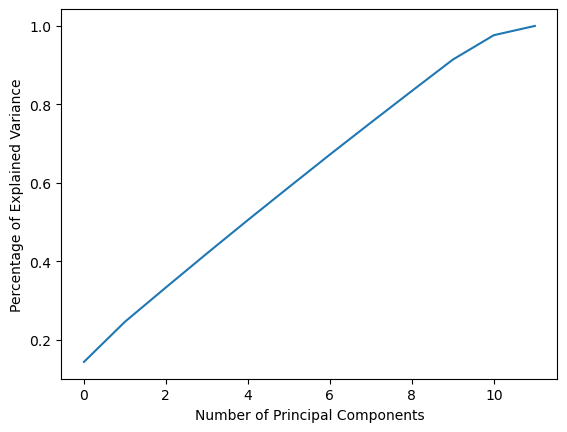

In [11]:
# Use a scree plot to visualize the contribution of each PC to the whole of variance
# Scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Principal Components")
plt.ylabel("Percentage of Explained Variance")
plt.show();

Ideally, the first few principal components would account for a vast majority of the variance in the data, potentially allowing us to reduce the dataset to as few as two features, which would be especially useful for visualizing the data. In this case, the first two principal components do provide larger portions of the variance than any of the individual components, but these components only account for a small amount of the data, at 14% and 10% each. PC's 3 - 10 are clearly still significant and worth including at 8% each. PC11 finally dips a bit smaller at 6%, and PC12 contributes only 2% of the variance seen in the data. 

This is consistent with what is seen in the scree plot, where PC's 1 and 2 (the x-axis starts at 0, rather than 1)can be seen to have slightly larger percentages of the variance, but the contribution of each PC remains fairly linear until it starts to taper off with the last two PCs, especially the final one (PC12, showing up as 11 on the x-axis). 

The goal of using Principal Component Analysis is to be able to omit several PC's by virtue of their contribution to the dataset's variance being irrelevant. This dataset does not appear to be a good fit for PCA, given that the two largest PC's only account for about a quarter of the variance, and PC's 3 - 11 have very similar contributions. 

I considered keeping PC12 in the dataset because I felt there was little utility gained in reducing dimensionality from 12 features to 11, possibly less utlity than would be provided by PC12's accounting for 2.35% of the variance in the data. However, this felt like it would potentially not be respecting the spirit of this assignment, which is geared around dimensionality reduction, so I decided to go ahead and eliminate it, bringing forward the other 11 PC's. 

<a id="#PartD3"></a>
## D3: Variance of Principal Components

With the decision made to set the `n_components` to 11, rather than the initial 12, the PCA process is repeated to reflect this change. This is done here, along with the final PCA loadings. 

In [12]:
# Knowing that we want 11 components in our PCA from the prior step, we repeat the PCA process to generate a 'final_pca'
final_pca = PCA(n_components = 11, random_state = 369)
# Fit the PCA to the standardized X data, then transform
final_pca.fit(X_std)
final_X_pca = final_pca.transform(X_std)
# Generate PCA loadings for the final_pca
final_X_pca_loadings = pd.DataFrame(final_pca.components_.T, 
                              columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11"], 
                              index = X_cols)
final_X_pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
latitude,-0.003058,-0.712542,0.129259,-0.064795,0.041323,-0.042849,0.007356,-0.057236,-0.052112,-0.002282,0.679482
longitude,0.007652,0.265927,-0.564164,-0.343004,-0.235514,0.001447,-0.528847,0.073338,0.052696,0.049266,0.384103
population,-0.022811,0.629684,0.253543,0.234772,0.102756,-0.052171,0.273410,-0.067840,-0.008722,-0.111711,0.614897
children,0.023338,-0.023013,0.350595,0.291952,-0.120299,0.448860,-0.545776,0.135776,0.068391,-0.503773,-0.006411
age,0.705901,0.008656,-0.003164,-0.022226,0.009154,0.013231,0.017394,-0.014133,-0.020392,0.006684,-0.001120
income,-0.022409,0.069844,0.088519,-0.137445,0.617902,0.477300,-0.128014,0.326653,-0.129952,0.463828,0.056180
vitamin_d_level,0.019598,-0.021974,-0.080655,0.560329,-0.011811,-0.391111,-0.297970,0.193906,-0.592419,0.219522,-0.003230
dr_visits,0.013893,0.013776,0.053630,0.048673,0.586993,-0.420889,-0.412970,-0.411310,0.354431,-0.064249,-0.056510
full_meals,0.027481,-0.111319,-0.299785,0.531892,-0.028744,0.033011,0.118341,0.351627,0.655825,0.196980,0.074130
vit_d_supp,0.019038,0.037972,0.338816,-0.343571,0.007752,-0.483288,-0.039963,0.698887,0.142103,-0.145438,-0.018554


With PC12 having been eliminated, we can run the same code from section D2 on the new data to verify the variance accounted for by each of the remaining 11 components. 

In [13]:
# Show the individual contribution of each PC to the whole
print(f"The amount of variance accounted for by each principal component can be seen here:")
# Doing this in a pretty way, rather than printing an unlabelled list of explained_variance_ratio_ values
pc_contributions = list(final_pca.explained_variance_ratio_)
pc_names = list(final_X_pca_loadings.columns)
for i in range(len(pc_names)):
    print(f"For {pc_names[i]}, the contribution is {round(pc_contributions[i] * 100, 3)}%")

The amount of variance accounted for by each principal component can be seen here:
For PC1, the contribution is 14.33%
For PC2, the contribution is 10.24%
For PC3, the contribution is 8.758%
For PC4, the contribution is 8.667%
For PC5, the contribution is 8.522%
For PC6, the contribution is 8.373%
For PC7, the contribution is 8.313%
For PC8, the contribution is 8.151%
For PC9, the contribution is 8.071%
For PC10, the contribution is 7.999%
For PC11, the contribution is 6.221%


This is consistent with the values obtained for each of these principal components in section D2. 

<a id="#PartD4"></a>
## D4: Total Variance


In [14]:
print(f"These 11 principal components explain {round(sum(final_pca.explained_variance_ratio_ * 100), 3)}% of variance in the data.")

These 11 principal components explain 97.644% of variance in the data.


Similarly, this is also consistent with what we would expect. The 12 principal components accounted for 100% of the variance in the dataset, and D12, which was removed, accounted for approximately 2.35% of that total. As a result, we'd expect the total of the remaining 11 principal components to be around 97.65% (100% minus ~2.35%).

<a id="#PartD5"></a>
## D5: Analysis Results

With the PCA steps of this assignment done, now I can proceed to addressing the actual research question that was put forward in section A1. I wanted to use PCA to try to predict patients who would be readmitted, which is directly related to the core issue put forth in the data dictionary for the medical dataset. This is a classification problem, so PCA was used to reduce the dimensionality of the dataset down to 11 components. A decision tree can then be used to classify patients based on the remaining 11 principal components, to attempt to predict whether or not a patient would be readmitted. This requires us to split the final PCA data (`final_x_pca`, generated in D3) and then fit a DecisionTreeClassifier to the training data and make predictions for the test data. A variety of metrics will be provided to ascertain the success (or failure) of this classification model. The example provided by [Conor O'Sullivan at Towards Data Science](https://towardsdatascience.com/visualising-the-classification-power-of-data-54f5273f640) was extremely useful for this section, in determining how to apply the classification process to the PCA-reduced data.

In [15]:
# With PCA finished, we can split the final_X_pca (which has been fit and transformed) to train and test sets for classification
# Split the data into train and test sets, 80% train, 20% test, use stratify to maintain proportions across split
X_train, X_test, y_train, y_test = train_test_split(final_X_pca, y, train_size = 0.8, test_size=0.2, random_state = 369, stratify = y)
# Verify that each of the X sets are shaped as expected, to reflect the 11 PC's
print(f"The shape of the X_train set is: {X_train.shape}")
print(f"The shape of the X_test set is: {X_test.shape}")

The shape of the X_train set is: (8000, 11)
The shape of the X_test set is: (2000, 11)


In [16]:
# Instantiate our classification model
classification_model = DecisionTreeClassifier(random_state=369).fit(X_train, y_train)
y_predictions = classification_model.predict(X_test)
# Generate accuracy report for this model
test_accuracy = accuracy_score(y_test, y_predictions)
print(f'Decision tree accuracy: {test_accuracy}') 
# Predict the test set probabilities of the positive class
y_pred_proba = classification_model.predict_proba(X_test)[:,1]
# Generate Confusion Matrix
final_matrix = confusion_matrix(y_test, y_predictions)
print("\nThe confusion matrix for this Decision Tree model:")
print("Predicted No Readmission  | Predicted Readmission")
print(f"                    {final_matrix[0]} Actual No Readmission")
print(f"                     {final_matrix[1]} Actual Readmission\n")

Decision tree accuracy: 0.881

The confusion matrix for this Decision Tree model:
Predicted No Readmission  | Predicted Readmission
                    [1131  135] Actual No Readmission
                     [103 631] Actual Readmission



This classification model, based solely on the 11 principal components generated by PCA, seems to do a pretty good job of predicting patient readmission, with an accuracy of over 88%. The confusion matrix demonstrates the effectiveness of this model quite well, as we can see that of the 2000 patients in the test set, the model correctly predicted readmission (or lack thereof) for 1762 patients (1131 + 631) and was incorrect on only 238 patients (103 + 135). The success of this model can also be visualized using a ROC (Receiver Operating Characteristic) curve. 

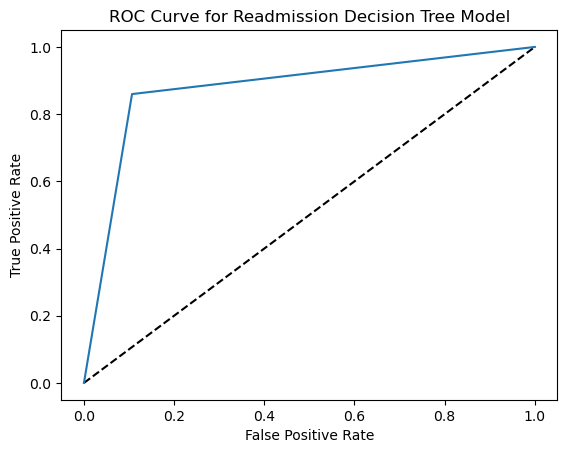

Area Under the Curve (AUC) score: 0.8765189767165567


In [17]:
# Generate ROC plot and provide AUC score 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Readmission Decision Tree Model')
plt.show()
# Compute roc_auc
roc_auc = roc_auc_score(y_test, y_pred_proba)
# Print test_roc_auc
print(f'Area Under the Curve (AUC) score: {roc_auc}')

On this graph, the center diagonal line represents classification performance if done completely randomly (50%). A classifier's performance can be plotted onto this graph, with a curve below the diagonal reflecting a poor prediction rate (all the way to 0% correct predictions in the bottom right) while a curve above the diagonal reflects a good prediction rate (all the way up to 100% correct predictions in the top left). The Area Under the Curve (AUC) score is the percentage of the graph's area that is beneath the curve created by the classification model, where a perfect (100% correct) model would have an AUC of 1.0 and a completely wrong (0% correct) model would have an AUC of 0.0. This model has an AUC of 0.876. This indicates that the model is quite effective at correctly predicting whether or not a patient will be readmitted. 

Regarding this outcome, I'm genuinely shocked at the results. This classification model operates solely on the 12 quantifiable features that were included in the PCA:
- Latitude of patient's residence
- Longitude of patient's residence
- Population of area of patient's residence
- Number of children in patient's household
- Age of patient
- Income of patient (or primary insurance holder)
- Patient's Vitamin D level
- Number of times the primary physician visited the patient
- Number of full meals eaten by patient during hospitalization
- Number of Vitamin D supplements administered to patient
- Length of initial hospitalization in days
- Average daily amount charged to patient for additional non-typical charges (procedures, treatments, medicines, etc.)

Latitude, longitude, and population would all seem to have little bearing on a patient's general health or healthcare outcomes, and I have spent a lengthy amount of time in prior projects railing against the idea that a patient's income should have *any* impact whatsoever on their hospitalization outcomes (or that this data should even be collected!). The other features presented here could much more reasonably have an intuitive impact on the patient's health or their healthcare outcomes after a hospitalization. 

This analysis ends up being relatively successful on the strength of the quantitative features alone, which surprisingly ignores many qualitative features of the overall dataset that would reasonably be expected to have very large impacts on a patient being rehospitalized. Such features include the reason for the initial admission (such as emergency care vs elective care), the complication risk (low, medium, or high), the patient having been diagnosed with a serious health condition (high blood pressure, diabetes, etc.), and many others. I would've expected the omission of these features to result in a much less effective model, but the success of this model indicates that the impact of these features is not as strong as I would've thought, at least where it comes to predicting a patient's future readmission. 

While this analysis is an unequivocal success, it is clear that there is still room for improvement. 88% accuracy is good, but there is room to be gained. I would be curious how much this could be improved upon by introducing qualitative variables to the model, or by expanding the data collected by the hospital system for analysis, especially focusing on patient treatment.

<a id="#PartE"></a>
## E: Code References

[William Townsend D206 Task 1 Performance Assessment Submission](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=c933f45d-fa5a-4fc9-a761-af340042a867), [William Townsend D209 Task 2 Performance Assessment Submission](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=45c9fcbc-e6e6-448d-9086-af6600016eba), and  were used for a number of pieces of code, particularly cleaning up the dataset as well as some of the elements relating to performing the Principal Component Analysis, given that these were very similar projects to this one. 

[Zeya LT @ Towards Data Science: Guide to Conditional Formatting in Pandas](https://towardsdatascience.com/a-quick-and-easy-guide-to-conditional-formatting-in-pandas-8783035071ee) was used for assistance with conditionally formatting the covariance matrix to easily pick out the features overly correlated with each other. 

[DataToFish: How to Create a Covariance Matrix](https://datatofish.com/covariance-matrix-python/) was used to generate a covariance matrix, rather than a much more cumbersome pairplot that I would've used instead (and would've been less precise).

[Conor O'Sullivan @ Towards Data Science: Visualizing the Classification Power of Data using PCA](https://towardsdatascience.com/visualising-the-classification-power-of-data-54f5273f640) was immensely useful as an example for the final portion of my analysis, both in its code and its context.

<a id="#PartF"></a>
## F: Source References

[Conor O'Sullivan @ Towards Data Science: Visualizing the Classification Power of Data using PCA](https://towardsdatascience.com/visualising-the-classification-power-of-data-54f5273f640) was immensely useful as an example for the final portion of my analysis, both in its code and its context.